In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Random walk

- 1 Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

- 2 Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

## 1

On commence par regarder ce qu'il se passe pour une particule 

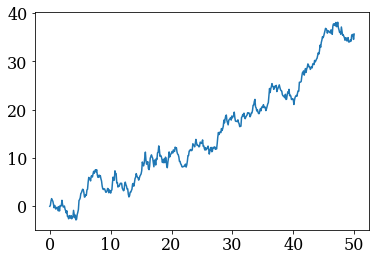

In [2]:
# Total simulation time
T=50.0

# Number of time steps and time interval dt
nt=500
dt=T/nt
c = 0.5

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x[i+1]=x[i]+ c*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

pyplot.plot(t,x)
pyplot.figure(figsize=(20,20))

Pour y voir plus claire regardons ce qu'il se passe pour plusieur particule 

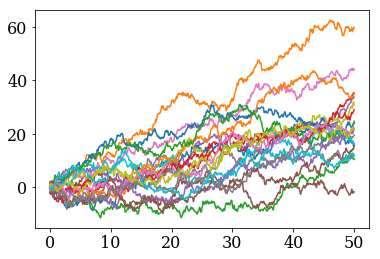

In [19]:
T=50.0
nt=500
dt=T/nt
alpha=2.0
c = 2/5
npart=100000

sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i] + c*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

On voit que la position finale moyenne des particules après un temps T n'est plus nul comme dans le mooc.

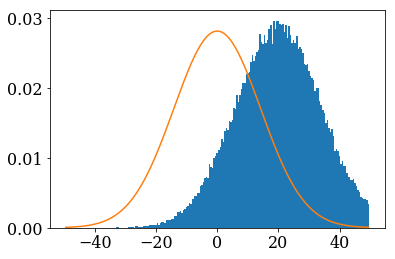

In [27]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2


# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

Nous remarquons que la distribution est toujours une distribution normale avec la même variance mais dont la moyenne a changée, elle est décalée ce qui correspond a ce qu'il ce produit pour les 20 particules 


Nous pouvons que la distribution sera une loi normale classique avec juste un changement dans la moyenne $\mu$ de la normal 

Nous pouvons le voir en faisant un changement de variable $ x = y+ct $ ce qui nous donne comme forme analytique.

$$\rho = \frac{\exp{\frac{(x-\mu-ct)^2}{{2\sigma^2}}}}{\sqrt{2\pi\alpha}} $$

## 2

Les premiere étapes sont identique au mooc et au point 1 

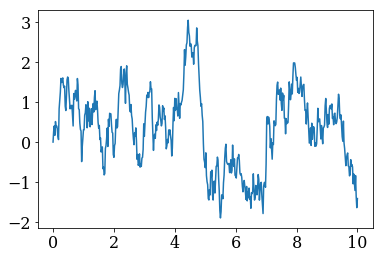

In [28]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=500
dt=T/nt
gama = 0.5

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x[i+1]=x[i] - x[i]*gama*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

pyplot.plot(t,x)

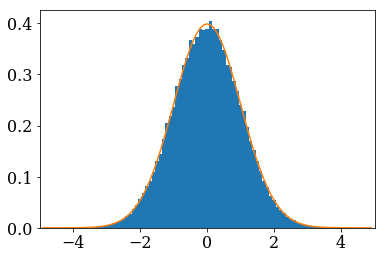

In [29]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

Text(0.5,1,'Trajectoire pour 20 particules')

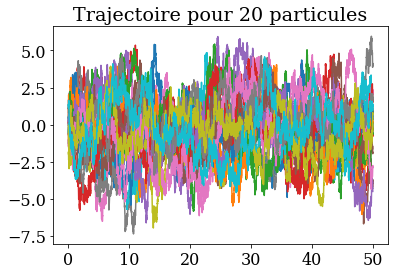

In [30]:
T=50
nt=5000
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i] - x[i]*gama*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])
    
pyplot.title('Trajectoire pour 20 particules')

# Challenge 3.3: Analyse de gamma
Dans ce challenge, nous regardons l'influence du facteur de friction gamma.
Premièrement, nous implémentons l'évolution dans le temps. 


In [31]:
# Comparaison avant et après un temps T 
T1=5
nt=500
dt=T1/nt
alpha=1
sigma = 1
mu = 0
gama = 2
npart=100000

t = numpy.arange(0,T1+dt,dt)
x = numpy.empty([nt+1,npart])
x0=numpy.random.normal(mu,sigma,npart)
x[0]=x0

# Generate bins centered around 0
binwidth=0.2
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

for i in range(nt):
    x[i+1]=x[i] - x[i]*gama*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

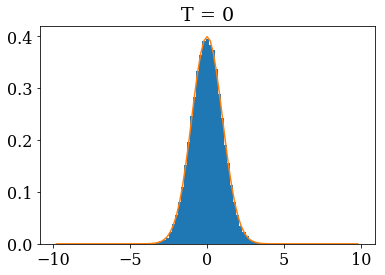

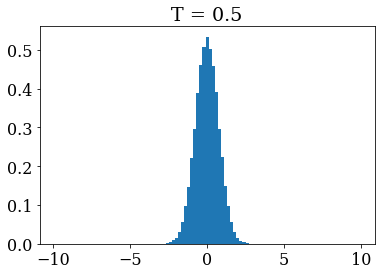

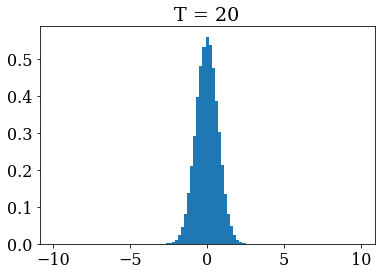

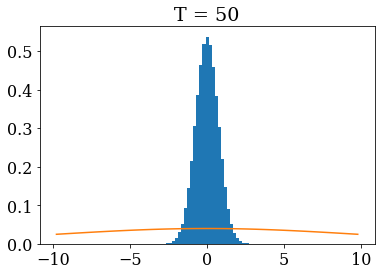

In [32]:
# Comparaison avant et après un temps T 
T=50
T1=0.5
T2=5
nt=500
dt=T/nt
dt1=T1/nt
dt2=T2/nt
alpha=1
sigma = 1
mu = 0
gama = 2
npart=100000

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])
ty = numpy.arange(0,T1+dt1,dt1)
y = numpy.empty([nt+1,npart])
tz = numpy.arange(0,T2+dt2,dt2)
z = numpy.empty([nt+1,npart])
x0=numpy.random.normal(mu,sigma,npart)
x[0]=x0
y[0]=x0
z[0]=x0

# Generate bins centered around 0
binwidth=0.2
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

for i in range(nt):
    x[i+1]=x[i] - x[i]*gama*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    y[i+1]=y[i] - y[i]*gama*dt1 +numpy.sqrt(2*alpha*dt1)*numpy.random.normal(0,1,npart)
    z[i+1]=z[i] - z[i]*gama*dt2 +numpy.sqrt(2*alpha*dt2)*numpy.random.normal(0,1,npart)
    
pyplot.hist(x[0],bins,normed=True);
pyplot.title('T = 0')
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma))/numpy.sqrt(2*numpy.pi*sigma))
pyplot.figure()
pyplot.title('T = 0.5')
pyplot.hist(y[-1],bins,normed=True);
pyplot.figure()
pyplot.title('T = 20')
pyplot.hist(z[-1],bins,normed=True);
pyplot.figure()
pyplot.title('T = 50')

pyplot.hist(x[-1],bins,normed=True);


    
sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

Nous remarquons que la distribution est toujours une distribution normale centrée mais que la variance a diminuée pour atteindre un état stable après un certain temps.
Etant donné que la distribution des molécules après un certain temps ne varient plus ou presque, nous pouvons en déduire que pour un temps infini, l'état sera stable.


Ensuite, pour trouver une forme analytique à notre problème, il semble judicieux de regarder la dépendance de la variance de notre nouvelle distribution normale. En effet, la valeur moyenne ne varie ou presque  pas avec l'apparition du facteur de friction et la distribution semble toujours suivre une loi normale.


Les facteurs qui influencent la solution sont alpha,gamma et le temps. Nous avions vu au dessus qu'à partir d'un certain temps la variance ne varie presque plus et si l'on néglige cette partie instable de la solution, on peut supposer que la variance ne dépend pas du temps. Il nous suffit donc, de faire varier alpha et gamma, de regarder le graphique de la variance en fonction de ces deux facteurs pour ensuite déterminer la relation qui existe entre la variance, le facteur de friction gamma et alpha.

In [33]:
nt=50
gamma =2.
var = numpy.empty(nt+1)
param = numpy.empty([2,20])
for j in range(20):
    gamma= gamma + 1/20
    for i in range(nt):
        x[i+1] = x[i] + (2*alpha*dt)**0.5 * numpy.random.normal(0,1,npart) - gamma*x[i]*dt
        var[i] = numpy.var(x[i])
    param[0,j]=numpy.average(var[i])
    param[1,j]=gamma

array([ 1.32292708, -0.38712758])

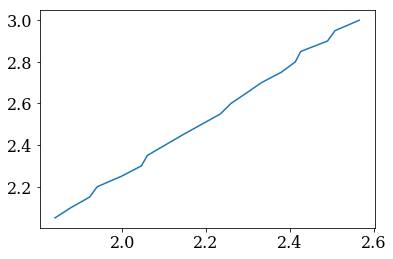

In [34]:
pyplot.plot(1/param[0], param[1])
numpy.polyfit(1/param[0], param[1],1)

Si nous négligeons le terme indépendant de la droite, on voit donc que l'on obtient une droite :

$$ \sigma^2=\frac{C}{\gamma} \quad \text{ où C est une constante } $$ 

In [35]:
alpha=1.0
gamma=0.6
var = numpy.empty(nt+1)
param = numpy.empty([2,20])
for j in range(20):
    alpha= alpha + 1/20
    for i in range(nt):
        x[i+1] = x[i] + (2*alpha*dt)**0.5 * numpy.random.normal(0,1,npart) - gamma*x[i]*dt
        var[i] = numpy.var(x[i])
    param[0,j]=numpy.average(var[i])
    param[1,j]=alpha

array([ 0.58334306, -0.00074103])

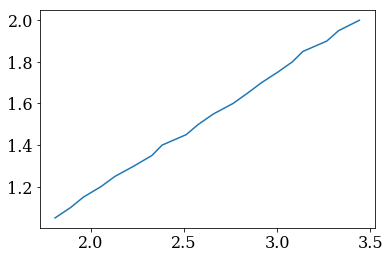

In [36]:
pyplot.plot(param[0],param[1])
numpy.polyfit(param[0],param[1],1)

Le graphique d'alpha en fonction de la variance montre  aussi une droite qui a un terme indépendant très faible.
Ce qui correspond bien avec le résultat obtenu au dessus si l'on suppose que le terme indépendant est négligeable étant donné que nous avons tracé un graphique qui prends en compte la moyenne de la variance sur toute l'évolution dans le temps, alors que nous avions remarqué qu'il y avait un "temps de relaxation" avant que la variance ne soit plus influencé par le temps. 

Nous avons donc:



$$ \alpha =C\sigma^2\gamma\qquad\text{où gamma ici vaut 100}$$


Donc: $$ C=\frac{100}{\gamma}=1 $$

Proposons donc la forme analytique suivante:

$$\rho = \frac{\exp{\frac{x^2}{\frac{2\alpha}{\gamma}}}}{\sqrt{\frac{2\pi\alpha}{\gamma}}} $$



In [37]:
def normaldistrib(x,mu,sigma):
    
    gauss = 1/(2*numpy.pi*sigma**2)**0.5 * numpy.exp(-0.5/sigma**2 *(x-mu)**2)
    return gauss

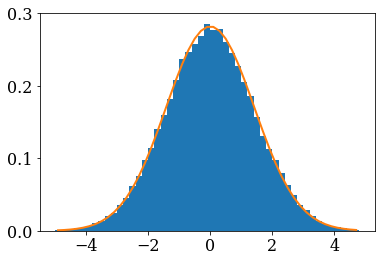

In [38]:
npart=100000
nt=5000
gamma=0.5
alpha=1
sigma_anal=numpy.sqrt(alpha/(gamma))
x=numpy.empty([nt+1,npart])
x[0]=numpy.random.normal(mu,sigma,npart)
for i in range (nt):
    x[i+1] = x[i] + (2*alpha * dt)**0.5 * numpy.random.normal(0,1,npart) - gamma*x[i]*dt
pyplot.figure()
binwidth=0.2
bins = numpy.arange(-5.,5.,binwidth)
pyplot.hist(x[-1],bins,normed=True);
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,normaldistrib(xc,0,sigma_anal), lw=2)